In [22]:
import pandas as pd
from datetime import date, timedelta
import requests
import matplotlib.pyplot as plt

In [3]:
url = "https://api.covid19tracking.narrativa.com/api/countries/spain/regions/canarias/sub_regions"
payload = {}
headers= {}
response = requests.request("GET", url, headers=headers, data = payload)

In [7]:
response

<Response [200]>

In [8]:
print(response.json())

{'countries': [{'spain': {'canarias': [{'id': 'tenerife', 'name': 'Tenerife', 'name_es': 'Tenerife', 'name_it': 'Tenerife'}, {'id': 'la_palma', 'name': 'La Palma', 'name_es': 'La Palma', 'name_it': 'La Palma'}, {'id': 'la_gomera', 'name': 'La Gomera', 'name_es': 'La Gomera', 'name_it': 'La Gomera'}, {'id': 'lanzarote', 'name': 'Lanzarote', 'name_es': 'Lanzarote', 'name_it': 'Lanzarote'}, {'id': 'fuerteventura', 'name': 'Fuerteventura', 'name_es': 'Fuerteventura', 'name_it': 'Fuerteventura'}, {'id': 'el_hierro', 'name': 'El Hierro', 'name_es': 'El Hierro', 'name_it': 'El Hierro'}, {'id': 'gran_canaria', 'name': 'Gran Canaria', 'name_es': 'Gran Canaria', 'name_it': 'Gran Canaria'}]}}]}


In [14]:
response.json()

{'message': 'Internal server error'}

In [41]:
today = date.today()
today_formatted = today.strftime("%Y-%m-%d")
for i in range(100):
    previous_date = today - timedelta(i)
    previous_date_formatted = previous_date.strftime("%Y-%m-%d")
    url = "https://api.covid19tracking.narrativa.com/api/country/spain/region/canarias/sub_region/fuerteventura?date_from="+previous_date_formatted+"&date_to="+today_formatted
    payload = {}
    headers= {}
    response = requests.request("GET", url, headers=headers, data = payload)
    if response.json() == {'message': 'Internal server error'}:
        break
    else:
        print('finished ' + str(i))
print('max is ' + str(i))

finished 0
finished 1
finished 2
finished 3
finished 4
finished 5
finished 6
finished 7
finished 8
finished 9
finished 10
finished 11
finished 12
finished 13
finished 14
finished 15
finished 16
finished 17
finished 18
finished 19
finished 20
finished 21
finished 22
finished 23
finished 24
finished 25
finished 26
finished 27
finished 28
finished 29
finished 30
finished 31
finished 32
finished 33
finished 34
finished 35
finished 36
finished 37
finished 38
finished 39
finished 40
finished 41
finished 42
finished 43
finished 44
finished 45
finished 46
finished 47
finished 48
finished 49
finished 50
finished 51
finished 52
finished 53
finished 54
finished 55
finished 56
finished 57
finished 58
finished 59
finished 60
finished 61
finished 62
max is 63


In [42]:
today = date.today()
two_weeks_ago = today - timedelta(60)
today = today.strftime("%Y-%m-%d")
two_weeks_ago = two_weeks_ago.strftime("%Y-%m-%d")

In [43]:
url = "https://api.covid19tracking.narrativa.com/api/country/spain/region/canarias/sub_region/fuerteventura?date_from="+two_weeks_ago+"&date_to="+today
payload = {}
headers= {}
response = requests.request("GET", url, headers=headers, data = payload)

In [44]:
response.json()

{'dates': {'2021-01-08': {'countries': {'Spain': {'date': '2021-01-08',
     'id': 'spain',
     'links': [{'href': '/api/2021-01-08/country/spain',
       'rel': 'self',
       'type': 'GET'}],
     'name': 'Spain',
     'name_es': 'España',
     'name_it': 'Spagna',
     'regions': [{'date': '2021-01-08',
       'id': 'canarias',
       'links': [{'href': '/api/2021-01-08/country/spain/region/canarias',
         'rel': 'self',
         'type': 'GET'}],
       'name': 'Canarias',
       'name_es': 'Canarias',
       'name_it': 'Canarias',
       'source': 'John Hopkins University',
       'sub_regions': [{'date': '2021-01-08',
         'id': 'fuerteventura',
         'name': 'Fuerteventura',
         'name_es': 'Fuerteventura',
         'name_it': 'Fuerteventura',
         'source': ' Consejería de Sanidad Gobierno de Canarias',
         'today_confirmed': 1086,
         'today_deaths': 0,
         'today_new_confirmed': 23,
         'today_new_deaths': 0,
         'today_vs_yesterday

In [45]:
    confirmed_deaths = []
    for day in response.json()['dates']:
        today_deaths = response.json()['dates'][day]['countries']['Spain']['regions'][0]['sub_regions'][0]['today_deaths']
        confirmed_deaths.append({'date': day, 'total_deaths': today_deaths})

In [46]:
df = pd.DataFrame(confirmed_deaths)
df

,date,total_deaths
0,2021-01-08,0
1,2021-01-09,0
2,2021-01-10,0
3,2021-01-11,0
4,2021-01-12,0
...,...,...
56,2021-03-05,0
57,2021-03-06,0
58,2021-03-07,0
59,2021-03-08,0


In [47]:
confirmed_cases = []
for day in response.json()['dates']:
    today_confirmed = response.json()['dates'][day]['countries']['Spain']['regions'][0]['sub_regions'][0]['today_confirmed']
    confirmed_cases.append({'date': day, 'confirmed_cases': today_confirmed})
confirmed_cases = pd.DataFrame(confirmed_cases)

<AxesSubplot:>

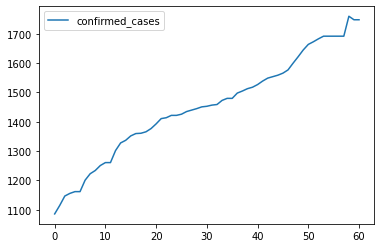

In [48]:
confirmed_cases.plot()

In [11]:
confirmed_cases

,date,confirmed_cases
0,2021-01-18,1261
1,2021-01-19,1261
2,2021-01-20,1302
3,2021-01-21,1328
4,2021-01-22,1337
5,2021-01-23,1352
6,2021-01-24,1360
7,2021-01-25,1361
8,2021-01-26,1366
9,2021-01-27,1377


In [70]:
new_cases_t2wk = []
for date in response.json()['dates']:
    new_cases = response.json()['dates'][date]['countries']['Spain']['regions'][0]['sub_regions'][0]['today_new_confirmed']
    new_cases_t2wk.append({'date': date, 'total_deaths': new_cases})

In [71]:
df_new_cases = pd.DataFrame(new_cases_t2wk)
df_new_cases

,date,total_deaths
0,2021-02-17,9
1,2021-02-18,12
2,2021-02-19,10
3,2021-02-20,5
4,2021-02-21,5
5,2021-02-22,7
6,2021-02-23,11
7,2021-02-24,23
8,2021-02-25,22
9,2021-02-26,23


In [73]:
df_new_cases['date'].values

array(['2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20',
       '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24',
       '2021-02-25', '2021-02-26', '2021-02-27', '2021-02-28',
       '2021-03-01', '2021-03-02', '2021-03-03'], dtype=object)